In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_generator = train_data_gen.flow_from_directory(
        '/content/drive/MyDrive/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        '/content/drive/MyDrive/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
validation_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
label=['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))


In [ ]:
emotion_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 //128,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 128)

Epoch 1/50
224/224 [==============================] - 2583s 12s/step - loss: 1.7534 - accuracy: 0.2846 - val_loss: 1.6096 - val_accuracy: 0.3728
Epoch 2/50
224/224 [==============================] - 1279s 6s/step - loss: 1.5355 - accuracy: 0.4074 - val_loss: 1.4380 - val_accuracy: 0.4395
Epoch 3/50
224/224 [==============================] - 654s 3s/step - loss: 1.3948 - accuracy: 0.4685 - val_loss: 1.2993 - val_accuracy: 0.4944
Epoch 4/50
224/224 [==============================] - 360s 2s/step - loss: 1.3031 - accuracy: 0.5001 - val_loss: 1.2446 - val_accuracy: 0.5204
Epoch 5/50
224/224 [==============================] - 258s 1s/step - loss: 1.2463 - accuracy: 0.5234 - val_loss: 1.2258 - val_accuracy: 0.5262
Epoch 6/50
224/224 [==============================] - 226s 1s/step - loss: 1.2018 - accuracy: 0.5442 - val_loss: 1.1897 - val_accuracy: 0.5399
Epoch 7/50
224/224 [==============================] - 220s 980ms/step - loss: 1.1856 - accuracy: 0.5499 - val_loss: 1.1984 - val_accuracy: 

In [ ]:

emotion_model.save('emotion.h5')

In [ ]:
from keras.models import load_model
emotion_model=load_model('emotion.h5')


In [ ]:
label=['']

happy


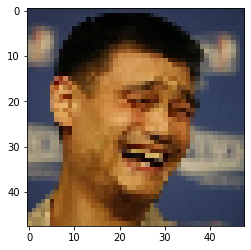

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
image =load_img('/content/a.jpg.crdownload', target_size = (48,48))
plt.imshow(image)
img = img_to_array(image)
img = img.reshape(1,48,48,3) 
img = img.astype('float32')
img = img/255
label=['angry','disgust','fear','happy','neutral','sad','surprise']
print(label[np.argmax(emotion_model.predict(img))])